In [1]:
%matplotlib inline

import io, os, sys, types, datetime

from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from numpy.linalg import eig, inv

import math

from scipy import interpolate, spatial, stats

import seaborn as sns

import skimage.io as skiIo
from skimage import exposure, img_as_float

from sklearn import linear_model
from sklearn import metrics

# import cv2

import pickle



In [2]:
### import custom functions
import Data_quantification_function_helper as my_help
import Data_quantification_function_intensity_calculation as my_int
import Data_quantification_function_parse_bundle as my_pb
import Data_quantification_functions_plotting as my_plot

In [3]:
""" ============== path settings =============="""

' ============== path settings =============='

In [4]:
# global isMac
isMac = False

if(isMac):
    supPrefix = '/Users/lily/Lily/Academic/AW_Lab/data/fate_switching_gfp_rfp_old/'
    dataPrefix = os.path.join(supPrefix, 'Data')
    figOutPrefix = os.path.join(supPrefix, 'Output', 'FigureOutput_v0422')
    dataOutPrefix = os.path.join(supPrefix, 'Output', 'DataOutput_v0422')
else:
    supPrefix = 'Z:\\lab\\Projects\\NSP\\Data_Analysis\\Experiments\\Fate_Switching\\GFP_RFP\\Summaries\\ver2018'
    dataPrefix = os.path.join(supPrefix, 'Data')
    figOutPrefix = os.path.join(supPrefix, 'FigureOutput_v0422')
    dataOutPrefix = os.path.join(supPrefix, 'DataOutput_v0422')

In [5]:
def saveDataFile(data, nameparams, outputDir):
    categoryID, sampleID, regionID = nameparams
    now = datetime.datetime.now()
    date_info = str(now.year)+str(now.month)+str(now.day)
    outputname = categoryID + '_sample' + str(sampleID) + '_region' + str(regionID) + '_v' + date_info + '.pickle'
    
    my_help.check_dir(outputDir)
    outputname = os.path.join(outputDir, outputname)
    pickle_out = open(outputname,"wb")
    pickle.dump(data, pickle_out)
    pickle_out.close()

In [6]:
""" ============== Golbal variables and parameters =============="""

' ============== Golbal variables and parameters =============='

In [7]:
### global variables
global ColorCode, targetIndexMatch, bins, channel_mapping
bins = 4096

In [8]:
### analysis parameters
radiusExpanseRatio = 1.5
num_angleSection = 20
num_outsideAngle = 20
num_Xsection = 20
z_offset = 25
analysisParams = [num_angleSection, num_outsideAngle, num_Xsection, z_offset, radiusExpanseRatio]

In [9]:
"""============== main =============="""

'============== main =============='

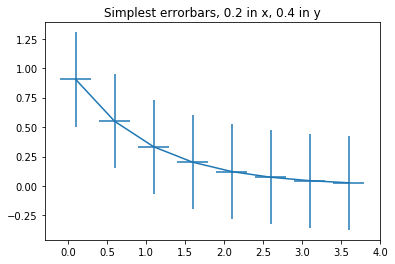

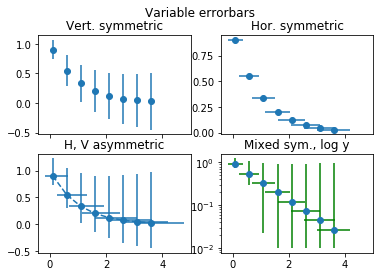

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

fig.suptitle('Variable errorbars')

plt.show()

In [11]:
x = [0, 1, 2, 3]
R3 = [0.3, 0.6, 0.84, 1.23]
dR3 = [0.05, 0.1, 0.2, 0.2]
R4 = [0.4, 0.4, 0.55, 0.8]
dR4 = [0.05, 0.09, 0.15, 0.3]
R3_Fz = [0.35, 0.62, 0.95, 1.35]
dR3_Fz = [0.05, 0.1, 0.2, 0.2]
R4_Nic = [0.37, 0.37, 0.57, 0.77]
dR4_Nic = [0.05, 0.1, 0.2, 0.2]

In [12]:
len(x)

4

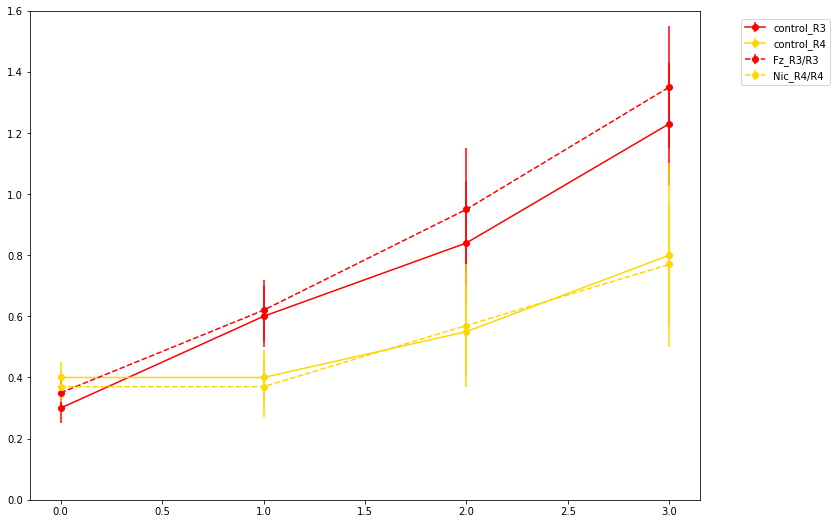

In [13]:
fig = plt.subplots(1,1,figsize = (12,9))
plt.errorbar(x, R3, yerr = dR3, fmt='-o', color = 'r', label = "control_R3")
plt.errorbar(x, R4, yerr = dR4, fmt='-o', color = 'gold', label = "control_R4")
plt.errorbar(x, R3_Fz, yerr = dR3_Fz, fmt='--o', color = 'r', label = "Fz_R3/R3")
plt.errorbar(x, R4_Nic, yerr = dR4_Nic, fmt='--o', color = 'gold', label = "Nic_R4/R4")
plt.ylim([0, 1.6])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)

plt.show()


In [14]:
0.55+0.25

0.8

In [15]:
### file parameters
# input file folders
imageFolder = 'Images'
ROIFolder = 'ROIs'
summaryFolder = 'Summaries'

In [16]:
""" Load data """

' Load data '

In [17]:
### file parameters
# file folders
imageFolder = 'Images'
ROIFolder = 'ROIs'
annotationFolder = 'Annotations'
summaryFolder = 'Summary'
annotationsubFolder = '28hrs'

In [18]:
# load summary statistics file
mypath = os.path.join(supPrefix, 'Data', 'Summary')
sum_df = pd.read_csv(os.path.join(mypath, 'Numbers_Summary.csv'))

In [19]:
# load annotation files
mypath = os.path.join(dataPrefix, annotationFolder, annotationsubFolder)
folders, files = my_help.parseFolderInfo(mypath)
for filename in files:
    if('.csv' in filename):
        df_temp = pd.read_csv(os.path.join(mypath, filename))
        if(files.index(filename) == 0):
            annots_df = df_temp
        else:
            df_temp = pd.read_csv(os.path.join(mypath, filename))
            annots_df = annots_df.append(df_temp, ignore_index=True, sort=True)
#     print(df_temp)

In [20]:
# load data files
outputData = {}
filepaths = my_help.getFilePaths(dataOutPrefix)
for i in range(len(filepaths)):
    print(i)
    pickle_in = open(filepaths[i],"rb")
    outputData[i] = pickle.load(pickle_in)
    if(outputData[i]['categoryID'] == 'Nic'):
        outputData[i]['categoryID'] = 'N'
        nameparams = outputData[i]['categoryID'], outputData[i]['sampleID'], outputData[i]['regionID']
        outputDir = os.path.join(dataOutPrefix, outputData[i]['categoryID'])
        saveDataFile(outputData[i], nameparams, outputDir)

0
1
2
3
4
5
6
7


In [21]:
# correct for heel position of R3 and R4s
sum_df_group = sum_df.groupby(['Type', 'sampleID', 'regionID'])
annots_df_group = annots_df.groupby(['CategoryID', 'SampleID', 'RegionID'])

In [22]:
for i in outputData.keys():
    category = outputData[i]['categoryID']
#     if((category == 'Nic') | (category == 'N')):
#         category1 = 'N'
#         category2 = 'Nic'
#     else:
#         category1 = category
#         category2 = category
    sampleID = outputData[i]['sampleID']
    regionID = outputData[i]['regionID']
    print("===")
    print(category, sampleID, regionID)
    params = outputData[i]['Parameter']
    sum_df_current = sum_df_group.get_group((category, sampleID, regionID))
    annots_df_current = annots_df_group.get_group((category, sampleID, regionID))
    for ind in range(len(params)):
        bundle_no = annots_df_current.iloc[ind]['Bundle_No']
        r3_heel = params[ind][0][2][7]
        r4_heel = params[ind][0][2][8]
        r3_ind = sum_df_current.index[(sum_df_current['bundle_no'] == bundle_no) & (sum_df_current['Rtype'] == 3)].tolist()
        r4_ind = sum_df_current.index[(sum_df_current['bundle_no'] == bundle_no) & (sum_df_current['Rtype'] == 4)].tolist()
        if(len(r3_ind) == 2):
            angle1 = sum_df.loc[r3_ind[0], 'angle_avg']
            angle2 = sum_df.loc[r3_ind[1], 'angle_avg']
            if(angle1 < angle2):
                sum_df.loc[r3_ind[0], 'length_corrected'] = sum_df.loc[r3_ind[0], 'length'] - r3_heel
                sum_df.loc[r3_ind[1], 'length_corrected'] = sum_df.loc[r3_ind[1], 'length'] - r4_heel
            else:
                sum_df.loc[r3_ind[0], 'length_corrected'] = sum_df.loc[r3_ind[0], 'length'] - r4_heel
                sum_df.loc[r3_ind[1], 'length_corrected'] = sum_df.loc[r3_ind[1], 'length'] - r3_heel
        elif(len(r4_ind) == 2):
            angle1 = sum_df.loc[r4_ind[0], 'angle_avg']
            angle2 = sum_df.loc[r4_ind[1], 'angle_avg']
            if(angle1 < angle2):
                sum_df.loc[r4_ind[0], 'length_corrected'] = sum_df.loc[r4_ind[0], 'length'] - r3_heel
                sum_df.loc[r4_ind[1], 'length_corrected'] = sum_df.loc[r4_ind[0], 'length'] - r4_heel
            else:
                sum_df.loc[r4_ind[0], 'length_corrected'] = sum_df.loc[r4_ind[0], 'length'] - r4_heel
                sum_df.loc[r4_ind[1], 'length_corrected'] = sum_df.loc[r4_ind[0], 'length'] - r3_heel
        if(len(r3_ind) == 1):
            sum_df.loc[r3_ind, 'length_corrected'] = sum_df.loc[r3_ind, 'length'] - r3_heel
        if(len(r4_ind) == 1):
            sum_df.loc[r4_ind, 'length_corrected'] = sum_df.loc[r4_ind, 'length'] - r4_heel
        if((len(r4_ind) > 2) | (len(r3_ind) > 2)):
            print('Error! multiple incidents of same bundle!!')

===
Control 3 1
===
Control 1 1
===
N 1 1
===
N 4 1
===
N 2 1
===
N 3 1
===
Fz 1 1
===
Fz 4 1


In [23]:
sum_df_groups = sum_df.groupby(('Type', 'Rtype', 'R3_flag', 'R4_flag'))

C:\Users\sf942274\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [24]:
sum_df_groups.mean()

sampleID  regionID  bundle_no    angle1  \
Type    Rtype R3_flag R4_flag                                            
Control 3     0       0        2.488372       1.0  35.395349 -0.416279   
        4     0       0        2.375000       1.0  31.968750  0.530625   
Fz      3     0       0        2.166667       1.0  33.611111 -0.766667   
              1       0        3.142857       1.0  43.000000  0.064286   
        4     0       0        2.304348       1.0  33.304348  0.769565   
                      1        2.714286       1.0  29.571429  0.150000   
N       3     0       0        2.366667       1.0  22.200000 -0.660000   
              1       0        1.000000       1.0  28.000000  0.000000   
        4     0       0        2.111111       1.0  18.972222  0.741667   
                      1        2.400000       1.0  22.800000  0.240000   

                                 angle2    length  angle_avg  angle_abs  \
Type    Rtype R3_flag R4_flag                                             
Control 3     0       0       -0.451163  1.090698  -0.367442   0.688372   
        4     0       0        0.624375  0.779687   0.577500   0.596250   
Fz      3     0       0       -0.850000  1.281667  -0.758333   0.791667   
              1       0        0.085714  1.169286   0.075000   0.867857   
        4     0       0        0.886957  0.861304   0.828261   0.828261   
                      1        0.192857  1.069286   0.171429   1.114286   
N       3     0       0       -0.680000  1.088667  -0.545000   0.755000   
              1       0        0.150000  0.900000   0.075000   0.675000   
        4     0       0        0.783333  0.790556   0.745833   0.762500   
                      1        0.150000  0.724000   0.166667   1.100000   

                               length_corrected  
Type    Rtype R3_flag R4_flag                    
Control 3     0       0                0.853401  
        4     0       0                0.550406  
Fz      3     0       0                1.054085  
              1       0                0.955565  
        4     0       0                0.631976  
                      1                0.829756  
N       3     0       0                0.839343  
              1       0                0.687792  
        4     0       0                0.545757  
                      1                0.472303

In [25]:
wt_R3 = sum_df_groups.get_group(('Control', 3, 0, 0))
wt_R4 = sum_df_groups.get_group(('Control', 4, 0, 0)) 

In [26]:
N_R3 = sum_df_groups.get_group(('N', 3, 0, 0)) 
N_R4 = sum_df_groups.get_group(('N', 4, 0, 0)) 

In [27]:
FZ_R3 = sum_df_groups.get_group(('Fz', 3, 0, 0)) 
FZ_R4 = sum_df_groups.get_group(('Fz', 4, 0, 0)) 

In [28]:
N_R3 = sum_df_groups.get_group(('Fz', 3, 0, 0)) 
N_R4 = sum_df_groups.get_group(('N', 4, 0, 0)) 

In [29]:
FZ_2R3 = sum_df_groups.get_group(('Fz', 3, 1, 0)) 
N_2R4 = sum_df_groups.get_group(('N', 4, 0, 1)) 

In [30]:
N_2R4

,Type,sampleID,regionID,bundle_no,Rtype,R3_flag,R4_flag,angle1,angle2,length,angle_avg,angle_abs,length_corrected
191,N,1,1,23,4,0,1,-1.2,-1.2,0.90,-1.2,1.2,0.593322
192,N,1,1,23,4,0,1,1.8,1.8,0.82,1.8,1.8,0.614397
204,N,2,1,14,4,0,1,0.6,0.0,0.90,0.0,0.0,0.611647
206,N,2,1,14,4,0,1,-0.6,-0.6,0.82,NaN,NaN,0.604372
212,N,2,1,19,4,0,1,1.2,1.2,0.90,1.2,1.2,0.614766
213,N,2,1,19,4,0,1,-0.9,-0.9,0.82,-0.9,0.9,0.610528
230,N,3,1,2,4,0,1,1.5,1.5,0.52,1.5,1.5,0.222886
231,N,3,1,2,4,0,1,-0.9,-0.9,0.52,-0.9,0.9,0.226838
252,N,4,1,56,4,0,1,0.0,-0.9,0.52,-1.2,1.2,0.296105
253,N,4,1,56,4,0,1,0.9,1.5,0.52,1.2,1.2,0.328170


In [33]:
N_2R4.loc[206, 'angle_avg'] = -0.6
N_2R4.loc[206, 'angle_abs'] = abs(N_2R4.loc[206, 'angle_avg'])

C:\Users\sf942274\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [80]:
y = [wt_R3.mean()['length_corrected'], wt_R4.mean()['length_corrected'], FZ_2R3.mean()['length_corrected'], N_2R4.mean()['length_corrected']]
y_error = [wt_R3.std()['length_corrected'], wt_R4.std()['length_corrected'], FZ_2R3.std()['length_corrected'], N_2R4.std()['length_corrected']]

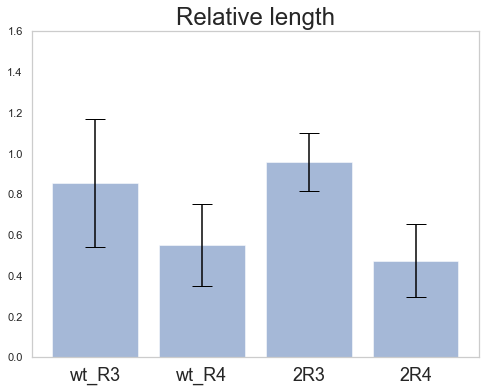

In [82]:
name = ('wt_R3', 'wt_R4', '2R3', '2R4')
x_pos = np.arange(len(name))
 
fig, ax = plt.subplots(figsize = (4*2, 3*2))
# fig, ax = plt.subplots(figsize = (18,12))
ax.bar(x_pos, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(name, fontsize = 18)
ax.set_title('Relative length', fontsize = 24)
ax.yaxis.grid(True)
ax.set_ylim((0, 1.6))
plt.grid(b=None)

In [36]:
a = wt_R4.loc[:,'angle_abs']

In [37]:
a = N_R4.loc[:,'angle_abs']
b = wt_R4.loc[:,'angle_abs']

In [38]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=2.6430964310202083, pvalue=0.00956561479398666)

In [87]:
y = [N_R3.mean()['angle_abs'], N_R4.mean()['angle_abs'], N_2R4.mean()['angle_abs']]
y_error = [N_R3.std()['angle_abs'], N_R4.std()['angle_abs'], N_2R4.std()['angle_abs']]
name = ('wt_R3', 'wt_R4', '2R4')


In [88]:
# y = [FZ_R3.mean()['angle_abs'], FZ_R4.mean()['angle_abs'], FZ_2R3.mean()['angle_abs']]
# y_error = [FZ_R3.std()['angle_abs'], FZ_R4.std()['angle_abs'], FZ_2R3.std()['angle_abs']]
# name = ('wt_R3', 'wt_R4', '2R3')


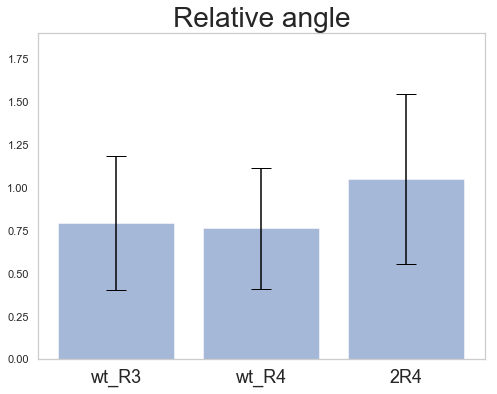

In [89]:

x_pos = np.arange(len(name))
 
fig, ax = plt.subplots(figsize = (4*2, 3*2))
ax.bar(x_pos, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(name, fontsize = 18)
ax.set_title('Relative angle', fontsize = 28)
ax.yaxis.grid(True)
ax.set_ylim((0, 1.9))
plt.grid(b=None)

In [ ]:
y
y_error

In [ ]:
name = ('Fz_R3', 'FZ_R4', 'FZ_2R3')


In [ ]:
category, sampleID, regionID

In [ ]:
ind

In [ ]:
summaries_df_current

In [ ]:
sum_df.loc[191, :]

In [ ]:
summaries_df_current.iloc[ind]

In [ ]:
summaries_df_current.iloc[0]

In [ ]:
summaries_df_current

In [ ]:
sum_df_group.get_group((('Nic', 1, 1)))

In [ ]:
sum_df_group.groups

In [ ]:
summaries_df_group

In [ ]:

sum_df_current.index[(sum_df_current['bundle_no'] == 1) & (sum_df_current['Rtype'] == 4)]

In [ ]:
len(outputData[0]['Parameter'])

In [ ]:
### file parameters
# file folders
imageFolder = 'Images'
ROIFolder = 'ROIs'
summaryFolder = 'Summaries'

# file name
summaryNames = {}
summaryNames['Control'] = ('Control_s1r1_summary.csv','Control_s3r1_summary.csv')
summaryNames['Fz'] = ('Fz_s1r1_summary.csv', 'Fz_s4r1_summary.csv')
summaryNames['Nic'] = ('Ni_s2r1_summary.csv', 'Ni_s1r1_summary.csv', 'Ni_s3r1_summary.csv', 'Ni_s4r1_summary.csv')

In [ ]:
sumNames = ['Control_s1r1_summary.csv', 'Control_s3r1_summary.csv', 'Fz_s1r1_summary.csv', 'Fz_s4r1_summary.csv','Ni_s2r1_summary.csv', 'Ni_s3r1_summary.csv', 'Ni_s4r1_summary.csv', 'Ni_s2r1_summary.csv']
Categories = ['Control', 'Control', 'Fz', 'Fz', 'Nic', 'Nic', 'Nic', 'Nic']
dataNames = ['Control_sample1_region1_v2019422.pickle', 'Control_sample3_region1_v2019423.pickle', 'Fz_sample1_region1_v2019422.pickle', 'Fz_sample4_region1_v2019422.pickle', 'Nic_sample1_region1_v2019422.pickle', 'Nic_sample2_region1_v2019422.pickle', 'Nic_sample3_region1_v2019422.pickle', 'Nic_sample4_region1_v2019422.pickle']

In [ ]:
"""Load data"""
Images = {}
ROI_dfs = {}
annot_dfs = {}
image_shapes = {}
M2P_ratios = {}
bundles_dfs = {}
annot_bundles_dfs = {}
annot_bundles_dfs_good = {}
for i in range(len(sumNames)):
    print(i)
    sumName = sumNames[i]
    summary_df = pd.read_csv(os.path.join(dataPrefix, summaryFolder, sumName))
    image_list = summary_df.loc[:,'Image_Name'].unique()
    ROI_list = summary_df.loc[:,'ROI_Name'].unique()
    imageName = image_list[0]
    ROIName = ROI_list[0]
#     %time Images[i] = img_as_float(skiIo.imread(os.path.join(imgDataPrefix, imageName)))
    ROI_dfs[i] = pd.read_csv(os.path.join(dataPrefix, ROIFolder, ROIName))
    ROI_dfs[i].rename(columns = {' ':'No'}, inplace = True)
    annot_dfs[i] = summary_df.groupby(['Image_Name']).get_group(image_list[0]).reset_index(drop = True)
#     image_shapes[i] = (Images[i].shape[0], Images[i].shape[1], Images[i].shape[2])
    M2P_ratios[i] = (summary_df.iloc[0]['imgX_pixel']/summary_df.iloc[0]['imgX_um'], summary_df.iloc[0]['imgY_pixel']/summary_df.iloc[0]['imgY_um'])
    bundles_dfs[i] = my.getBundlesInfo(ROI_dfs[i], annot_dfs[i], M2P_ratios[i][0], M2P_ratios[i][1])
    annot_bundles_dfs[i] = bundles_dfs[i].dropna(axis=0, how='any', inplace = False)
    annot_bundles_dfs_good[i] = my.Good_QC_df(annot_bundles_dfs[i])

In [ ]:
len(annot_bundles_dfs_good[3])

In [ ]:
""" Load IntensityMatrix Data """
outputDatas = {}
for i in range(len(dataNames)):
    print(i)
    inputname = os.path.join(dataOutPrefix, Categories[i], dataNames[i])
    pickle_in = open(inputname,"rb")
    outputDatas[i] = pickle.load(pickle_in)

In [ ]:
list(set(Categories))

In [ ]:
""" Parameters """
relAxisParams = outputDatas[0]['Parameter'][0][1][0]
xTicks_ori = np.round(np.linspace(0, radiusExpanseRatio, num_Xsection+1), 2)
yTicks_ori = relAxisParams[5]*-1

In [ ]:
tickTypeX = 1
tickTypeY = 2
tickArg2_X = 5
tickArg2_Y = [-2, -1,0, 1, 2]
tickParams = xTicks_ori, yTicks_ori, tickTypeX, tickTypeY, tickArg2_X, tickArg2_Y 

In [ ]:
def getIndexList(bundles_df):
    doubleR3List = []
    doubleR4List = []
    wtList = []
    
    for ind in range(bundles_df.shape[0]):    
        if((bundles_df.iloc[ind]['FL_R4'] == 0) & (bundles_df.iloc[ind]['FL_R3'] == 2)):
#             print('two R3: ', str(ind))
            doubleR3List.append(ind)
        elif((bundles_df.iloc[ind]['FL_R4'] == 1) & (bundles_df.iloc[ind]['FL_R3'] == 1)):
#             print('WT: ', str(ind))
            wtList.append(ind)
        elif((bundles_df.iloc[ind]['FL_R4'] == 2) & (bundles_df.iloc[ind]['FL_R3'] == 0)):
#             print('two R4: ', str(ind))
            doubleR4List.append(ind)
#     print(doubleR3List)
    return (doubleR3List, doubleR4List, wtList)

In [ ]:
""" Get R3 and R4(gfp) intensity matrix and boundary conditions """
## initialization
sum_gfpMatrix = {}
sum_r3Matrix = {}
boundaries = {}
for cat in list(set(Categories)):
    sum_gfpMatrix[cat] = {}
    sum_r3Matrix[cat] = {}
    
for i in range(len(dataNames)):
    cat = Categories[i]
    gfp = outputDatas[i]['IntensityMatrix'][0,1,2,:,:,:,:]
    r3 = outputDatas[i]['IntensityMatrix'][0,2,2,:,:,:,:]
    sum_gfp = np.sum(gfp, axis = 3)
    sum_r3 = np.sum(r3, axis = 3)
    sum_gfpMatrix[cat][i] = sum_gfp
    sum_r3Matrix[cat][i] = sum_r3

In [ ]:
def plotSummaryMatrix(matrix, cmap, vmax, tickParams, labelParams):
    sns.set(font_scale=2)
    xTick_ori, yTick_ori, tickTypeX, tickTypeY, tickArg2_X, tickArg2_Y = tickParams
    ylabel, xlabel = labelParams
    xTicks = my.getTickList(tickTypeX, xTick_ori, tickArg2_X)
    yTicks = my.getTickList(tickTypeY, yTick_ori, tickArg2_Y)
    
    ax = plt.subplot(111)
    sns.heatmap(matrix, cmap = cmap, yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
#     ax2.set_title(title, fontsize=16)
#     ax2.invert_yaxis()

In [ ]:
"""Control_summary"""

In [ ]:

sum_gfpMatrix['Control']['Sum'] = np.concatenate((sum_gfpMatrix['Control'][0], sum_gfpMatrix['Control'][1]), axis=0)
sum_r3Matrix['Control']['Sum'] = np.concatenate((sum_r3Matrix['Control'][0], sum_r3Matrix['Control'][1]), axis=0)

In [ ]:
sum_gfpMatrix['Control']['Sum'].shape

In [ ]:
sum_r3Matrix['Control']['Sum'].shape

In [ ]:
vmax_gfp = np.ceil(np.percentile(sum_gfpMatrix['Control']['Sum'].flatten(), 95))
vmax_r3 = np.ceil(np.percentile(sum_r3Matrix['Control']['Sum'].flatten(), 95))

ylabel = 'Rel. Angle'
xlabel = 'Rel. Length'
labelParams = ylabel, xlabel

plotSummaryMatrix(np.mean(sum_r3Matrix['Control']['Sum'], axis = 0), 'Reds', vmax_r3, tickParams, labelParams)

In [ ]:
plotSummaryMatrix(np.mean(sum_gfpMatrix['Control']['Sum'], axis = 0), 'Greens', vmax_gfp, tickParams, labelParams)

In [ ]:
""" Plot sample images """
i = 27
gfp_smp = outputDatas[1]['IntensityMatrix'][0,1,2,i,:,:,:]
r3_smp = outputDatas[1]['IntensityMatrix'][0,2,2,i,:,:,:]

vmax_gfp = np.ceil(np.percentile(sum_gfpMatrix['Control'][1].flatten(), 99))
vmax_r3 = np.ceil(np.percentile(sum_r3Matrix['Control'][1].flatten(), 99))

ylabel = 'Rel. Angle'
xlabel = 'Rel. Length'
labelParams = ylabel, xlabel

plotSummaryMatrix(np.sum(gfp_smp, axis = 2), 'Greens', vmax_gfp, tickParams, labelParams)


In [ ]:
plotSummaryMatrix(np.sum(r3_smp, axis = 2), 'Reds', vmax_r3, tickParams, labelParams)


In [ ]:
"""Notch perturbed"""

In [ ]:
ls_3 = getIndexList(annot_bundles_dfs_good[4])

In [ ]:
sum_gfpMatrix['Nic']['dR3'] = {}
sum_gfpMatrix['Nic']['dR4'] = {}
sum_gfpMatrix['Nic']['wt'] = {}
sum_r3Matrix['Nic']['dR3'] = {}
sum_r3Matrix['Nic']['dR4'] = {}
sum_r3Matrix['Nic']['wt'] = {}
for ind in [4, 5, 6]:
    indList = getIndexList(annot_bundles_dfs_good[ind])
    print(indList)
    sum_gfpMatrix['Nic']['dR3'][ind] = sum_gfpMatrix['Nic'][ind][indList[0], :, :]
    sum_gfpMatrix['Nic']['dR4'][ind] = sum_gfpMatrix['Nic'][ind][indList[1], :, :]
    sum_gfpMatrix['Nic']['wt'][ind] = sum_gfpMatrix['Nic'][ind][indList[2], :, :]
    sum_r3Matrix['Nic']['dR3'][ind] = sum_r3Matrix['Nic'][ind][indList[0], :, :]
    sum_r3Matrix['Nic']['dR4'][ind] = sum_r3Matrix['Nic'][ind][indList[1], :, :]
    sum_r3Matrix['Nic']['wt'][ind] = sum_r3Matrix['Nic'][ind][indList[2], :, :]


In [ ]:
# sum_gfpMatrix['Nic']['dR3']['Sum'] = sum_gfpMatrix['Nic']['dR3'][4]
# sum_gfpMatrix['Nic']['dR4']['Sum'] = sum_gfpMatrix['Nic']['dR4'][4]
# sum_gfpMatrix['Nic']['wt']['Sum'] = sum_gfpMatrix['Nic']['wt'][4]
# sum_r3Matrix['Nic']['dR3']['Sum'] = sum_r3Matrix['Nic']['dR3'][4]
# sum_r3Matrix['Nic']['dR4']['Sum'] = sum_r3Matrix['Nic']['dR4'][4]
# sum_r3Matrix['Nic']['wt']['Sum'] = sum_r3Matrix['Nic']['wt'][4]


sum_gfpMatrix['Nic']['dR3']['Sum'] = np.concatenate((sum_gfpMatrix['Nic']['dR3'][4], sum_gfpMatrix['Nic']['dR3'][5], sum_gfpMatrix['Nic']['dR3'][6]), axis=0)
sum_gfpMatrix['Nic']['dR4']['Sum'] = np.concatenate((sum_gfpMatrix['Nic']['dR4'][4], sum_gfpMatrix['Nic']['dR4'][5], sum_gfpMatrix['Nic']['dR4'][6]), axis=0)
sum_gfpMatrix['Nic']['wt']['Sum'] = np.concatenate((sum_gfpMatrix['Nic']['wt'][4], sum_gfpMatrix['Nic']['wt'][5], sum_gfpMatrix['Nic']['wt'][6]), axis=0)
sum_r3Matrix['Nic']['dR3']['Sum'] = np.concatenate((sum_r3Matrix['Nic']['dR3'][4], sum_r3Matrix['Nic']['dR3'][5], sum_r3Matrix['Nic']['dR3'][6]), axis=0)
sum_r3Matrix['Nic']['dR4']['Sum'] = np.concatenate((sum_r3Matrix['Nic']['dR4'][4], sum_r3Matrix['Nic']['dR4'][5], sum_r3Matrix['Nic']['dR4'][6]), axis=0)
sum_r3Matrix['Nic']['wt']['Sum'] = np.concatenate((sum_r3Matrix['Nic']['wt'][4], sum_r3Matrix['Nic']['wt'][5], sum_r3Matrix['Nic']['wt'][6]), axis=0)
sum_r3Matrix['Nic']['Sum'] = np.concatenate((sum_r3Matrix['Nic']['dR4']['Sum'], sum_r3Matrix['Nic']['wt']['Sum']), axis=0)
sum_gfpMatrix['Nic']['Sum'] = np.concatenate((sum_gfpMatrix['Nic']['dR4']['Sum'], sum_gfpMatrix['Nic']['wt']['Sum']), axis=0)

In [ ]:
sum_r3Matrix['Nic']['Sum'].shape

In [ ]:
vmax_gfp = np.ceil(np.percentile(sum_gfpMatrix['Nic']['Sum'].flatten(), 92))
vmax_r3 = np.ceil(np.percentile(sum_r3Matrix['Nic']['Sum'].flatten(), 99))

In [ ]:
# plotSummaryMatrix(sum_r3Matrix['Nic']['dR4']['Sum'][9,:,:], 'Reds', vmax_r3, tickParams, labelParams)

In [ ]:
# plotSummaryMatrix(sum_gfpMatrix['Nic']['dR4']['Sum'][12,:,:], 'Greens', vmax_gfp, tickParams, labelParams)

In [ ]:
[0,2,3,4,(5),6,7,(8),9,10,(11),(12)], [0,3,4, 5, 7,9,10,11,12]

In [ ]:
sum_gfpMatrix['Nic']['dR4']['Sum'] = sum_gfpMatrix['Nic']['dR4']['Sum'][:, :, :]

In [ ]:
sum_gfpMatrix['Nic']['dR4']['Sum'].shape

In [ ]:
plotSummaryMatrix(np.mean(sum_gfpMatrix['Nic']['dR4']['Sum'], axis = 0), 'Greens', vmax_gfp, tickParams, labelParams)

In [ ]:
# vmax_gfp = np.ceil(np.percentile(sum_gfpMatrix['Nic']['dR4']['Sum'].flatten(), 90))
# vmax_r3 = np.ceil(np.percentile(sum_r3Matrix['Nic']['dR4']['Sum'].flatten(), 95))

ylabel = 'Rel. Angle'
xlabel = 'Rel. Length'
labelParams = ylabel, xlabel

plotSummaryMatrix(np.mean(sum_r3Matrix['Nic']['dR4']['Sum'], axis = 0), 'Reds', vmax_r3, tickParams, labelParams)

In [ ]:
vmax_r3

In [ ]:
sum_gfpMatrix['Nic']['dR4']['Sum'].shape

In [ ]:
plotSummaryMatrix(np.mean(sum_r3Matrix['Nic']['wt']['Sum'], axis = 0), 'Reds', vmax_r3, tickParams, labelParams)

In [ ]:
plotSummaryMatrix(np.mean(sum_gfpMatrix['Nic']['wt']['Sum'], axis = 0), 'Greens', vmax_gfp, tickParams, labelParams)

In [ ]:
"""Fz perturbed"""

In [ ]:
def getIndexList(bundles_df):
    doubleR3List = []
    doubleR4List = []
    wtList = []
    
    for ind in range(bundles_df.shape[0]):    
        if((bundles_df.iloc[ind]['FL_R4'] == 0) & (bundles_df.iloc[ind]['FL_R3'] == 2)):
#             print('two R3: ', str(ind))
            doubleR3List.append(ind)
        elif((bundles_df.iloc[ind]['FL_R4'] == 1) & (bundles_df.iloc[ind]['FL_R3'] == 1)):
#             print('WT: ', str(ind))
            wtList.append(ind)
        elif((bundles_df.iloc[ind]['FL_R4'] == 2) & (bundles_df.iloc[ind]['FL_R3'] == 0)):
#             print('two R4: ', str(ind))
            doubleR4List.append(ind)
#     print(doubleR3List)
    return (doubleR3List, doubleR4List, wtList)

In [ ]:
sum_gfpMatrix['Fz']['dR3'] = {}
sum_gfpMatrix['Fz']['dR4'] = {}
sum_gfpMatrix['Fz']['wt'] = {}
sum_r3Matrix['Fz']['dR3'] = {}
sum_r3Matrix['Fz']['dR4'] = {}
sum_r3Matrix['Fz']['wt'] = {}
for ind in [2,3]:
    indList = getIndexList(annot_bundles_dfs_good[ind])
    print(indList)
    sum_gfpMatrix['Fz']['dR3'][ind] = sum_gfpMatrix['Fz'][ind][indList[0], :, :]
    sum_gfpMatrix['Fz']['dR4'][ind] = sum_gfpMatrix['Fz'][ind][indList[1], :, :]
    sum_gfpMatrix['Fz']['wt'][ind] = sum_gfpMatrix['Fz'][ind][indList[2], :, :]
    sum_r3Matrix['Fz']['dR3'][ind] = sum_r3Matrix['Fz'][ind][indList[0], :, :]
    sum_r3Matrix['Fz']['dR4'][ind] = sum_r3Matrix['Fz'][ind][indList[1], :, :]
    sum_r3Matrix['Fz']['wt'][ind] = sum_r3Matrix['Fz'][ind][indList[2], :, :]
sum_gfpMatrix['Fz']['dR3']['Sum'] = np.concatenate((sum_gfpMatrix['Fz']['dR3'][2], sum_gfpMatrix['Fz']['dR3'][3]), axis=0)
sum_gfpMatrix['Fz']['dR4']['Sum'] = np.concatenate((sum_gfpMatrix['Fz']['dR4'][2], sum_gfpMatrix['Fz']['dR4'][3]), axis=0)
sum_gfpMatrix['Fz']['wt']['Sum'] = np.concatenate((sum_gfpMatrix['Fz']['wt'][2], sum_gfpMatrix['Fz']['wt'][3]), axis=0)
sum_r3Matrix['Fz']['dR3']['Sum'] = np.concatenate((sum_r3Matrix['Fz']['dR3'][2], sum_r3Matrix['Fz']['dR3'][3]), axis=0)
sum_r3Matrix['Fz']['dR4']['Sum'] = np.concatenate((sum_r3Matrix['Fz']['dR4'][2], sum_r3Matrix['Fz']['dR4'][3]), axis=0)
sum_r3Matrix['Fz']['wt']['Sum'] = np.concatenate((sum_r3Matrix['Fz']['wt'][2], sum_r3Matrix['Fz']['wt'][3]), axis=0)

In [ ]:
""" Plot sample images """
ind = 17
print(annot_bundles_dfs_good[3].index[ind])
gfp_smp = outputDatas[3]['IntensityMatrix'][0,1,2,ind,:,:,:]
r3_smp = outputDatas[3]['IntensityMatrix'][0,2,2,ind,:,:,:]

vmax_gfp = np.ceil(np.percentile(sum_gfpMatrix['Fz'][2].flatten(), 90))
vmax_r3 = np.ceil(np.percentile(sum_r3Matrix['Fz'][2].flatten(), 90))

ylabel = 'Rel. Angle'
xlabel = 'Rel. Length'
labelParams = ylabel, xlabel

plotSummaryMatrix(np.sum(gfp_smp, axis = 2), 'Greens', 10, tickParams, labelParams)


In [ ]:
plotSummaryMatrix(np.sum(r3_smp, axis = 2), 'Reds', 8, tickParams, labelParams)

In [ ]:
sum_r3Matrix['Fz']['dR3']['Sum'].shape

In [ ]:
vmax_gfp = np.ceil(np.percentile(sum_gfpMatrix['Fz']['wt']['Sum'].flatten(), 95
                                ))
vmax_r3 = np.ceil(np.percentile(sum_r3Matrix['Fz']['wt']['Sum'].flatten(), 99))

ylabel = 'Rel. Angle'
xlabel = 'Rel. Length'
labelParams = ylabel, xlabel

plotSummaryMatrix(np.mean(sum_r3Matrix['Fz']['dR3']['Sum'], axis = 0), 'Reds', vmax_r3, tickParams, labelParams)

In [ ]:
plotSummaryMatrix(np.mean(sum_gfpMatrix['Fz']['dR3']['Sum'], axis = 0), 'Greens', vmax_gfp, tickParams, labelParams)

In [ ]:
plotSummaryMatrix(np.mean(sum_r3Matrix['Fz']['wt']['Sum'], axis = 0), 'Reds', vmax_r3, tickParams, labelParams)

In [ ]:
plotSummaryMatrix(np.mean(sum_gfpMatrix['Fz']['wt']['Sum'], axis = 0), 'Greens', vmax_gfp, tickParams, labelParams)

In [ ]:
vmax_gfp = np.ceil(np.percentile(sum_gfp_ctrl.flatten(), 99))
vmax_r3 = np.ceil(np.percentile(sum_r3_ctrl.flatten(), 99))

In [ ]:
gfp_ctrl = outputDatas[0]['IntensityMatrix'][0,1,2,:,:,:,:]
r3_ctrl = outputDatas[0]['IntensityMatrix'][0,2,2,:,:,:,:]

In [ ]:
gfp_ctrl_2 = outputDatas[3]['IntensityMatrix'][0,1,2,:,:,:,:]
r3_ctrl_2 = outputDatas[3]['IntensityMatrix'][0,2,2,:,:,:,:]

In [ ]:
gfp_ctrl_smp10 = gfp_ctrl[9,:,:,:]
r3_ctrl_smp10 = r3_ctrl[9,:,:,:]

In [ ]:
"""Get min/max params"""
sliceType = 0
percentile = 95
sum_gfp_ctrl_1 = np.sum(gfp_ctrl, axis = 3)
sum_r3_ctrl_1 = np.sum(r3_ctrl, axis = 3)
vmax_gfp_ctrl_1 = np.ceil(np.percentile(sum_gfp_ctrl.flatten(), 99))
vmax_r3_ctrl_1 = np.ceil(np.percentile(sum_r3_ctrl.flatten(), 90))

In [ ]:
sum_gfp_ctrl_2 = np.sum(gfp_ctrl_2, axis = 3)
sum_r3_ctrl_2 = np.sum(r3_ctrl_2, axis = 3)
vmax_gfp_ctrl_2 = np.ceil(np.percentile(sum_gfp_ctrl_2.flatten(), 99))
vmax_r3_ctrl_2 = np.ceil(np.percentile(sum_r3_ctrl_2.flatten(), 90))

In [ ]:
# # tickParams = [1, 2, 5, [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]] ### tickTypeX, tickTypeY, tickArg2_X, tickArg2_Y
# tickTypeX = 1
# tickTypeY = 2
# tickArg2_X = 5
# tickArg2_Y = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

# pp = outputDatas[0]['Parameter'][0][0][1]
# xTick_ori = np.round(np.linspace(0, radiusExpanseRatio, gfp_ctrl_smp10[:,:,0].shape[1]), 2)
# xTicks = my.getTickList(tickTypeX, xTick_ori, tickArg2_X)
# yTick_ori = np.round(outputDatas[0]['Parameter'][0][1][0][5], 2)
# yTicks = my.getTickList(tickTypeY, yTick_ori, tickArg2_Y)

# ax2 =  plt.subplot(111)
# #     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# # sns.heatmap(np.mean(sum_GFP_matrix, axis = 2), cmap = 'Greens', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
# sns.heatmap(np.sum(gfp_ctrl_smp10, axis = 2), cmap = 'Greens', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_gfp_ctrl)
# # sns.heatmap(gfp_ctrl_smp10[21:22,:,20], cmap = 'Greens')
# ax2.set_ylabel('Rel. Angle', fontsize=16)
# ax2.set_xlabel('Rel. Length', fontsize=16)
# ax2.set_title('Sum over z-stack', fontsize=16)
# ax2.invert_yaxis()




In [ ]:
# ax2 =  plt.subplot(111)
# #     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# # sns.heatmap(np.mean(sum_R3_matrix, axis = 2), cmap = 'Reds', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
# sns.heatmap(np.sum(r3_ctrl_smp10, axis = 2), cmap = 'Reds', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_r3_ctrl)


# ax2.set_ylabel('Rel. Angle', fontsize=16)
# ax2.set_xlabel('Rel. Length', fontsize=16)
# ax2.set_title('Sum over z-stack', fontsize=16)
# ax2.invert_yaxis()

In [ ]:
vmax_gfp_ctrl, vmax_r3_ctrl

In [ ]:
""" Control """

In [ ]:
# tickParams = [1, 2, 5, [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]] ### tickTypeX, tickTypeY, tickArg2_X, tickArg2_Y
tickTypeX = 1
tickTypeY = 2
tickArg2_X = 5
tickArg2_Y = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

# pp = outputDatas[0]['Parameter'][0][0][1]
xTick_ori = np.round(np.linspace(0, radiusExpanseRatio, sum_gfp_ctrl_1[0,:,:].shape[1]), 2)
xTicks = my.getTickList(tickTypeX, xTick_ori, tickArg2_X)
yTick_ori = np.round(outputDatas[0]['Parameter'][0][1][0][5], 2)
yTicks = my.getTickList(tickTypeY, yTick_ori, tickArg2_Y)

ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_GFP_matrix, axis = 2), cmap = 'Greens', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_gfp_ctrl_1, axis = 0), cmap = 'Greens', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_gfp_ctrl_1)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()



In [ ]:
ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_R3_matrix, axis = 2), cmap = 'Reds', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_r3_ctrl_1, axis = 0), cmap = 'Reds', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_r3_ctrl_1)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
"Control-2"

In [ ]:
# tickParams = [1, 2, 5, [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]] ### tickTypeX, tickTypeY, tickArg2_X, tickArg2_Y
tickTypeX = 1
tickTypeY = 2
tickArg2_X = 5
tickArg2_Y = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

# pp = outputDatas[0]['Parameter'][0][0][1]
xTick_ori = np.round(np.linspace(0, radiusExpanseRatio, sum_gfp_ctrl[0,:,:].shape[1]), 2)
xTicks = my.getTickList(tickTypeX, xTick_ori, tickArg2_X)
# yTick_ori = np.round(pp[5], 2)
yTicks = my.getTickList(tickTypeY, yTick_ori, tickArg2_Y)

ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_GFP_matrix, axis = 2), cmap = 'Greens', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_gfp_ctrl_2, axis = 0), cmap = 'Greens', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_gfp_ctrl_2)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_R3_matrix, axis = 2), cmap = 'Reds', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_r3_ctrl_2, axis = 0), cmap = 'Reds', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_r3_ctrl_2)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
"Sum of controls"

In [ ]:
sum_r3_ctrl_2.shape

In [ ]:
sum_r3_ctrl_1.shape

In [ ]:
sum_gfp_ctrl = np.concatenate((sum_gfp_ctrl_2, sum_gfp_ctrl_1), axis=0, out=None)
sum_r3_ctrl = np.concatenate((sum_r3_ctrl_2, sum_r3_ctrl_1), axis=0, out=None)

In [ ]:
vmax_gfp_ctrl = np.ceil(np.percentile(sum_gfp_ctrl.flatten(), 95))
vmax_r3_ctrl = np.ceil(np.percentile(sum_r3_ctrl.flatten(), 90))

In [ ]:
ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_GFP_matrix, axis = 2), cmap = 'Greens', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_gfp_ctrl, axis = 0), cmap = 'Greens', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_gfp_ctrl)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_R3_matrix, axis = 2), cmap = 'Reds', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_r3_ctrl, axis = 0), cmap = 'Reds', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_r3_ctrl)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
"Fz-1"

In [ ]:
annot_bundles_dfs_good[1].index

In [ ]:
gfp_fz1 = outputDatas[1]['IntensityMatrix'][0,1,2,:,:,:,:]
r3_fz1_R3 = outputDatas[1]['IntensityMatrix'][0,2,0,:,:,:,:]
r3_fz1_R4 = outputDatas[1]['IntensityMatrix'][0,2,1,:,:,:,:]
r3_fz1_T0 = outputDatas[1]['IntensityMatrix'][0,2,2,:,:,:,:]

In [ ]:
a = list(annot_bundles_dfs_good[2].index)
a.index(34)

In [ ]:
annot_bundles_dfs_good[2].index

In [ ]:
gfp_fz2 = outputDatas[2]['IntensityMatrix'][0,1,2,:,:,:,:]
gfp_fz2 = outputDatas[2]['IntensityMatrix'][0,2,2,:,:,:,:]

In [ ]:
fz2_type1_list = [a.index(34), a.index(40), a.index(48), a.index(98)]#34, 40, 48, 98
fz2_type2_list = [a.index(18), a.index(38), a.index(41), a.index(44), a.index(45), a.index(52)]#18, 38, 41, 44, 45, 52

In [ ]:
fz1_type1_list = [1, 4,8,11] #6,8,27,34
fz1_type2_list = [3, 5, 12]#13, 16, 35

In [ ]:
ind = 4;
gfp_fz = gfp_fz1[ind,:,:,:]
r3_fz = r3_fz1_T0[ind,:,:,:]

In [ ]:
gfp_fz1_type1 = gfp_fz1[fz1_type1_list,:,:,:]
gfp_fz1_type2 = gfp_fz1[fz1_type2_list,:,:,:]

r3_fz1_R4_type1 = r3_fz1_R4[fz1_type1_list,:,:,:]
r3_fz1_R4_type2 = r3_fz1_R4[fz1_type2_list,:,:,:]

r3_fz1_R3_type1 = r3_fz1_R3[fz1_type1_list,:,:,:]
r3_fz1_R3_type2 = r3_fz1_R3[fz1_type2_list,:,:,:]

r3_fz1_T0_type1 = r3_fz1_T0[fz1_type1_list,:,:,:]
r3_fz1_T0_type2 = r3_fz1_T0[fz1_type2_list,:,:,:]

In [ ]:
"""Get min/max params"""
sliceType = 0
sum_GFP_matrix = np.sum(gfp_fz1_type1, axis = 3)
sum_r3_R3_matrix = np.sum(r3_fz1_R3_type1, axis = 3)
sum_r3_R4_matrix = np.sum(r3_fz1_R4_type1, axis = 3)
sum_r3_T0_matrix = np.sum(r3_fz1_T0_type1, axis = 3)

vmax_GFP = np.ceil(np.percentile(sum_GFP_matrix.flatten(), 99))
vmax_R3 = np.ceil(np.percentile(sum_r3_R3_matrix.flatten(), 90))



vmax_GFP, vmax_R3



In [ ]:
# tickParams = [1, 2, 5, [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]] ### tickTypeX, tickTypeY, tickArg2_X, tickArg2_Y
tickTypeX = 1
tickTypeY = 2
tickArg2_X = 5
tickArg2_Y = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

pp = outputDatas[0]['Parameter'][0][0][1]
xTick_ori = np.round(np.linspace(0, radiusExpanseRatio, sum_GFP_matrix[0,:,:].shape[1]), 2)
xTicks = my.getTickList(tickTypeX, xTick_ori, tickArg2_X)
yTick_ori = np.round(outputDatas[0]['Parameter'][0][1][0][5], 2)
yTicks = my.getTickList(tickTypeY, yTick_ori, tickArg2_Y)

ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_GFP_matrix, axis = 2), cmap = 'Greens', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.sum(gfp_fz, axis = 2), cmap = 'Greens', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_GFP)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_r3_T0_matrix, axis = 0), cmap = 'Reds', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_R3)
sns.heatmap(np.sum(r3_fz, axis = 2), cmap = 'Reds', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_R3)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_R3_matrix, axis = 2), cmap = 'Reds', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_r3_R3_matrix, axis = 0), cmap = 'Reds', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_R3)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_R3_matrix, axis = 2), cmap = 'Reds', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_r3_R4_matrix, axis = 0), cmap = 'Reds', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_R3)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_R3_matrix, axis = 2), cmap = 'Reds', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_r3_T0_matrix, axis = 0), cmap = 'Reds', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_R3)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
"""Get min/max params"""
sliceType = 0
sum_GFP_matrix = np.sum(gfp_fz1_type2, axis = 3)
sum_r3_R3_matrix = np.sum(r3_fz1_R3_type2, axis = 3)
sum_r3_R4_matrix = np.sum(r3_fz1_R4_type2, axis = 3)
sum_r3_T0_matrix = np.sum(r3_fz1_T0_type2, axis = 3)

# vmax_GFP = np.ceil(np.percentile(sum_GFP_matrix.flatten(), 99))
# vmax_R3 = np.ceil(np.percentile(sum_r3_R3_matrix.flatten(), 95))



vmax_GFP, vmax_R3

# tickParams = [1, 2, 5, [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]] ### tickTypeX, tickTypeY, tickArg2_X, tickArg2_Y
tickTypeX = 1
tickTypeY = 2
tickArg2_X = 5
tickArg2_Y = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]

pp = outputDatas[0]['Parameter'][0][0][1]
xTick_ori = np.round(np.linspace(0, radiusExpanseRatio, sum_GFP_matrix[0,:,:].shape[1]), 2)
xTicks = my.getTickList(tickTypeX, xTick_ori, tickArg2_X)
yTick_ori = np.round(pp[5], 2)
yTicks = my.getTickList(tickTypeY, yTick_ori, tickArg2_Y)

ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_GFP_matrix, axis = 2), cmap = 'Greens', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_GFP_matrix, axis = 0), cmap = 'Greens', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_GFP)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()

In [ ]:
ax2 =  plt.subplot(111)
#     sns.heatmap(np.sum(intensityMatrix, axis = 2), cmap = colormap, yticklabels = yTicks, xticklabels = xTicks)
# sns.heatmap(np.mean(sum_R3_matrix, axis = 2), cmap = 'Reds', yticklabels = False, xticklabels = False, vmin = vim, vmax = vmax)
sns.heatmap(np.mean(sum_r3_T0_matrix, axis = 0), cmap = 'Reds', yticklabels = yTicks, xticklabels = xTicks, vmin = 0, vmax = vmax_R3)
ax2.set_ylabel('Angle', fontsize=16)
ax2.set_xlabel('length from R-heel', fontsize=16)
ax2.set_title('Sum over z-stack', fontsize=16)
ax2.invert_yaxis()